# Goal:
- Classification of drugs.

# Content:
- The target feature is
     - Drug type
- The feature sets are:
     - Age
     - Sex
     - Blood Pressure Levels (BP)
     - Cholesterol Levels
     - Na to Potassium Ration

# Importing the Libraries

In [29]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("drug_classification.csv")

In [3]:
#view of first five rows of df
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# view of last five rows of df
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
# some statistical information
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
# some of the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.shape

(200, 6)

In [8]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [9]:
# knowing the missing values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
# corr matrix
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [11]:
# variance
df.var()

Age        273.714347
Na_to_K     52.185533
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

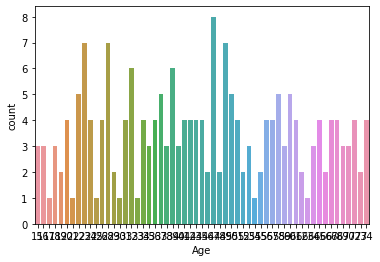

In [12]:
# countplot
sn.countplot(x="Age",data=df)

<AxesSubplot:xlabel='Na_to_K', ylabel='count'>

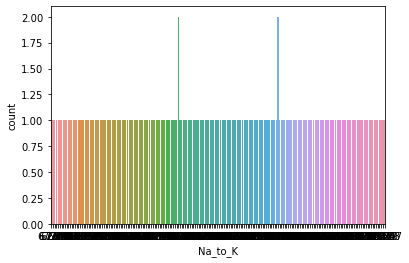

In [13]:
# countplot
sn.countplot(x="Na_to_K",data=df)

<AxesSubplot:>

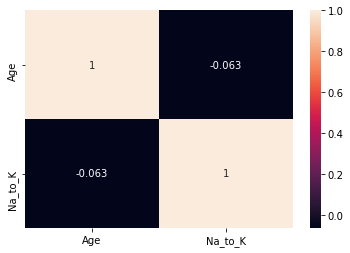

In [14]:
# constructing a heatmap
correlation = df.corr()
sn.heatmap(correlation,annot=True)

In [18]:
cols = ['Sex','BP','Cholesterol','Drug','Na_to_K']

In [19]:
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [21]:
#splitting of dataset
y = df['Drug']
X = df.drop('Drug',axis=1)

KNN:
- The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [26]:
scores = {}
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
scores['Knn'] = np.mean(cv_scores)
print(f"KNN SCORE : {np.mean(cv_scores)}")

KNN SCORE : 0.5849999999999999


Random forest regressor:
- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [28]:
rfc = RandomForestClassifier(random_state = 42)
cv_scores = cross_val_score(rfc, X, y, cv=5)
scores['RandomForest'] = np.mean(cv_scores)
print(f"Random Forest Score : {np.mean(cv_scores)}")

Random Forest Score : 0.99


Hence, the accuracy of random forest is more, this model is used to build the model.